In [1]:
import qiskit

In [2]:
import numpy as np
from scipy.linalg import expm
from qiskit import BasicAer
from qiskit import execute as q_execute
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import state_fidelity
from qiskit.aqua.operators import MatrixOperator, op_converter
from qiskit.aqua.components.initial_states import Custom

In [10]:
H = np.loadtxt('Hamposbh.txt')

In [11]:
num_qubits = 3

index1 = []
index2 = []
index3 = []
index4 = []
index5 = []
index6 = []
index7 = []
index8 = []

for i in range(1,8): 
    evo_time=0+i*0.1
    a = H.reshape(8,8)
  
    qubitOp = MatrixOperator(matrix=a)

    state_in = Custom(num_qubits, state_vector=([1,0,0,0,0,0,0,0]))

    qubit_op = op_converter.to_weighted_pauli_operator(qubitOp)
    quantum_registers = QuantumRegister(qubit_op.num_qubits)

    circuit = state_in.construct_circuit('circuit', quantum_registers)
    circuit += qubit_op.evolve(None, evo_time, 
                               num_time_slices=3,
                               quantum_registers=quantum_registers,
                               expansion_mode='suzuki',expansion_order=3)

    backend = BasicAer.get_backend('statevector_simulator')
    job = q_execute(circuit, backend)
    circuit_execution_result = np.asarray(job.result().get_statevector(circuit))
    
    index1.append(circuit_execution_result[0])
    index2.append(circuit_execution_result[1])
    index3.append(circuit_execution_result[2])
    index4.append(circuit_execution_result[3])
    index5.append(circuit_execution_result[4])
    index6.append(circuit_execution_result[5])
    index7.append(circuit_execution_result[6])
    index8.append(circuit_execution_result[7])

In [12]:
print("index1:",index1)
print("index2:",index2)
print("index3:",index3)
print("index4:",index4)
print("index5:",index5)
print("index6:",index6)
print("index7:",index7)
print("index8:",index8)

index1: [(0.932347467896421-0.31424389421167753j), (0.7446075666856382-0.5677878282318283j), (0.47862451249234955-0.7145745256078055j), (0.19242397457873966-0.7340993900386041j), (-0.05417882265652937-0.6358224741154912j), (-0.21421980973656485-0.4559997600187427j), (-0.26472969899394877-0.24781084176368284j)]
index2: [(0.028771262735697193+0.11921201007970393j), (0.10855929975220471+0.21178424045902927j), (0.22137441340983594+0.2572646156959782j), (0.34212137034556916+0.24603146019320843j), (0.4446205943769951+0.18124361521912308j), (0.5077670786091109+0.07764199619828148j), (0.5202792198279227-0.04244729582288112j)]
index3: [(-0.01206720750207754-0.025937430972899037j), (-0.04564981515568631-0.041397540735924686j), (-0.09350155627888548-0.038300731540593116j), (-0.14542833025897453-0.012776168240285463j), (-0.1906168872253525+0.03405087335775049j), (-0.22003483611378102+0.09647178498149066j), (-0.22831382811536227+0.165679973180253j)]
index4: [(0.003909929635642823+0.0081051654567260

In [13]:
abs1 = list(map(abs, index1))
probabilities1 = [number ** 2 for number in abs1]
abs2 = list(map(abs, index2))
probabilities2 = [number ** 2 for number in abs2]
abs3 = list(map(abs, index3))
probabilities3 = [number ** 2 for number in abs3]
abs4 = list(map(abs, index4))
probabilities4 = [number ** 2 for number in abs4]
abs5 = list(map(abs, index5))
probabilities5 = [number ** 2 for number in abs5]
abs6 = list(map(abs, index6))
probabilities6 = [number ** 2 for number in abs6]
abs7 = list(map(abs, index7))
probabilities7 = [number ** 2 for number in abs7]
abs8 = list(map(abs, index8))
probabilities8 = [number ** 2 for number in abs8]

In [14]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

Text(0, 0.5, 'Probability')

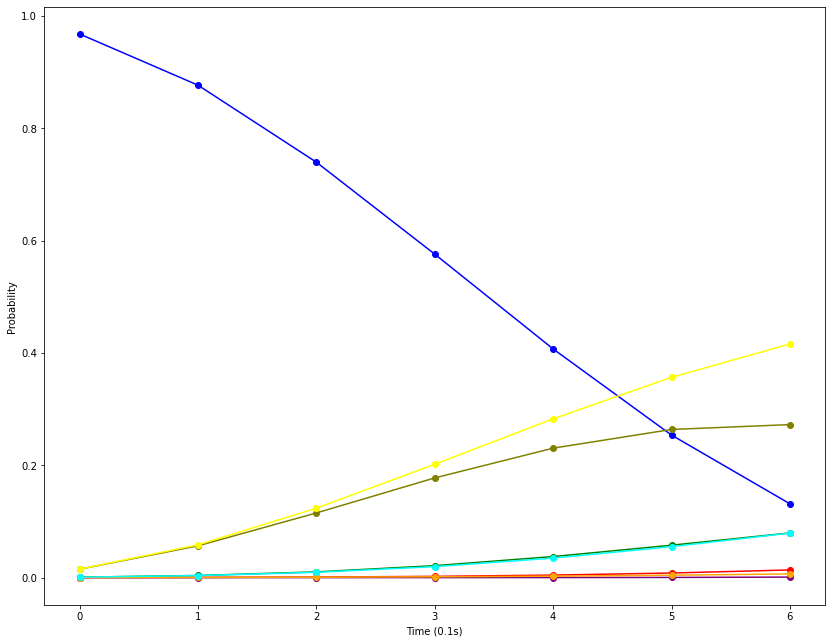

In [15]:
plt.figure(figsize=(14,11))

plt.plot(probabilities1, color='blue',marker='o')#changed
plt.plot(probabilities2, color='olive',marker='o')
plt.plot(probabilities3, color='green',marker='o')
plt.plot(probabilities4, color='red',marker='o')
plt.plot(probabilities5, color='purple',marker='o')#changed
plt.plot(probabilities6, color='orange',marker='o')#changed
plt.plot(probabilities7, color='cyan',marker='o')#changed
plt.plot(probabilities8, color='yellow',marker='o')#changed
plt.xlabel("Time (0.1s)")
plt.ylabel("Probability")
